<a href="https://colab.research.google.com/github/rymuelle/schlieren_openCV/blob/notebook/test_openpiv_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install openpiv

     |████████████████████████████████| 22.2MB 66.5MB/s 
     |████████████████████████████████| 163kB 54.6MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 


In [2]:
from openpiv import tools, process, validation, filters, scaling 
import numpy as np
import matplotlib.pyplot as plt

import cv2
from PIL import Image
import time

from urllib.request import urlopen

In [3]:
def get_image_from_url(url):
  img = -1
  with urlopen(url) as file:
    img = tools.imread(file.read())
  return img

In [4]:
url_a = "https://github.com/TAMU-DEEP/schlieren_openCV/blob/master/schlieren_openCV/8D5A0666.tif?raw=true"
url_b = "https://github.com/TAMU-DEEP/schlieren_openCV/blob/master/schlieren_openCV/8D5A0667.tif?raw=true"

In [5]:
get_image_from_url(url_a)

Array([[187.737, 211.715, 205.524, ..., 135.185, 134.033, 137.234],
       [154.655, 188.158, 177.404, ..., 144.599, 149.583, 123.368],
       [127.177, 151.875, 162.563, ..., 163.648, 140.413, 107.652],
       ...,
       [128.761, 129.47 , 158.753, ...,  81.625, 105.858,  91.471],
       [137.245, 151.975, 185.943, ...,  38.01 ,  47.402,  46.228],
       [129.625, 167.713, 160.647, ...,  32.749,  30.512,  31.398]])

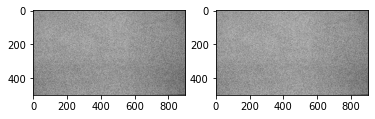

In [32]:
frame_a = get_image_from_url(url_a)
frame_b = get_image_from_url(url_b)

fig,ax = plt.subplots(1,2)
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)

winsize = 24 # pixels
searchsize = 64  # pixels, search in image B
overlap = 12 # pixels
dt = 0.02 # sec

u0, v0, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=winsize, overlap=overlap, dt=dt, search_area_size=searchsize, sig2noise_method='peak2peak' )

x, y = process.get_coordinates( image_size=frame_a.shape, window_size=winsize, overlap=overlap )

In [55]:
u1, v1, mask = validation.sig2noise_val( u0, v0, sig2noise, threshold = 1.3 )

u2, v2 = filters.replace_outliers( u1, v1, method='localmean', max_iter=10, kernel_size=2)

x, y, u3, v3 = scaling.uniform(x, y, u2, v2, scaling_factor = 10)

In [56]:
u3, v3 = u3-np.mean(u3), v3-np.mean(v3)
u3, v3 = u3/np.std(u3), v3/np.std(v3)

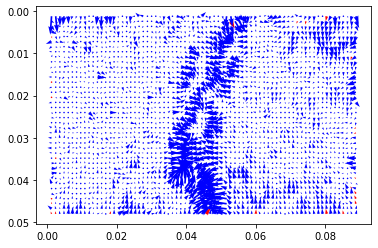

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcf922ed240>)

In [58]:
tools.save(x, y, u3, v3, mask, 'exp1_001.txt' )

tools.display_vector_field('exp1_001.txt', scale=100, width=0.005)